### Importing the libraries

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import skew, kurtosis
from tabulate import tabulate  

In [104]:
import warnings
warnings.filterwarnings("ignore")

### Reading the file

In [105]:
df = pd.read_csv('FuelConsumption.csv')

### Data Cleaning

##### Displaying the first five rows of dataset

In [106]:
df.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


##### Checking type of data and missing values

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB


##### Visualization for Null values

In [108]:
df.isna().sum()

Year                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64

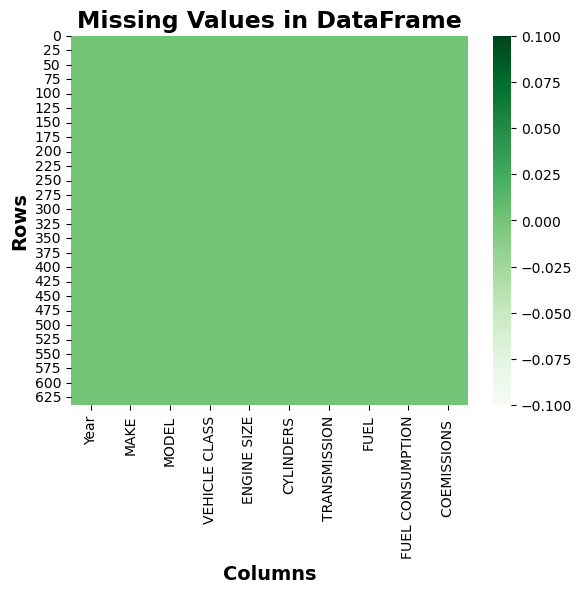

In [109]:
# Customize the color palette to green
sns.heatmap(df.isnull(), cmap='Greens', cbar=True)

plt.title('Missing Values in DataFrame', fontsize=17, fontweight='bold')
plt.xlabel('Columns', fontsize=14, fontweight='bold')
plt.ylabel('Rows', fontsize=14, fontweight='bold')
plt.show()

- Our dataset is completely clean and doesn't contain any Null Values

##### Checking the number of rows and columns in the dataset

In [110]:
df.shape

(639, 10)

- The dataset has 639 rows and 10 columns

##### Describing the data

In [111]:
df.describe(include='all')

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639,639,639,639.000000,639.000000,639,639,639.000000,639.000000
unique,NaN,36,328,14,NaN,NaN,8,5,NaN,NaN
top,NaN,CHEVROLET,JETTA,COMPACT,NaN,NaN,A4,X,NaN,NaN
freq,NaN,63,6,105,NaN,NaN,324,454,NaN,NaN
mean,2000.0,NaN,NaN,NaN,3.265728,5.805947,NaN,NaN,14.713615,296.809077
std,0.0,NaN,NaN,NaN,1.231012,1.625588,NaN,NaN,3.307044,65.504178
min,2000.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.900000,104.000000
25%,2000.0,NaN,NaN,NaN,2.200000,4.000000,NaN,NaN,12.500000,253.000000
50%,2000.0,NaN,NaN,NaN,3.000000,6.000000,NaN,NaN,14.400000,288.000000
75%,2000.0,NaN,NaN,NaN,4.300000,6.000000,NaN,NaN,16.600000,343.000000


##### Encoding the 'object' type columns

In [112]:
# Columns we want to encode

columns_to_encode_reg = ['FUEL','TRANSMISSION' ,'VEHICLE CLASS'] 

# Applying label encoding to each column in the list

for column in columns_to_encode_reg:
    df[column] = LabelEncoder().fit_transform(df[column])
    
# Print the dataset to check the changes
df

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,0,1.6,4,1,3,10.5,216
1,2000,ACURA,1.6EL,0,1.6,4,6,3,9.8,205
2,2000,ACURA,3.2TL,2,3.2,6,4,4,13.7,265
3,2000,ACURA,3.5RL,2,3.5,6,1,4,15.0,301
4,2000,ACURA,INTEGRA,9,1.8,4,1,3,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,7,2.4,5,1,4,14.4,288
635,2000,VOLVO,V70 GLT TURBO,7,2.4,5,1,4,13.6,274
636,2000,VOLVO,V70 T5 TURBO,7,2.3,5,1,4,13.9,274
637,2000,VOLVO,V70 T5 TURBO,7,2.3,5,6,4,13.0,260


##### Describing the data again

In [113]:
df.describe(include='all')

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639,639,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000
unique,NaN,36,328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,CHEVROLET,JETTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,63,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2000.0,NaN,NaN,5.818466,3.265728,5.805947,2.876369,3.239437,14.713615,296.809077
std,0.0,NaN,NaN,4.033741,1.231012,1.625588,2.357285,0.563195,3.307044,65.504178
min,2000.0,NaN,NaN,0.000000,1.000000,3.000000,0.000000,0.000000,4.900000,104.000000
25%,2000.0,NaN,NaN,2.000000,2.200000,4.000000,1.000000,3.000000,12.500000,253.000000
50%,2000.0,NaN,NaN,6.000000,3.000000,6.000000,1.000000,3.000000,14.400000,288.000000
75%,2000.0,NaN,NaN,9.000000,4.300000,6.000000,6.000000,4.000000,16.600000,343.000000


##### Dropping and displaying columns again

In [114]:
df.drop('Year', axis=1, inplace=True) #doing this as the columns doesnt bring any significant value

In [115]:
df.columns

Index(['MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MAKE              639 non-null    object 
 1   MODEL             639 non-null    object 
 2   VEHICLE CLASS     639 non-null    int32  
 3   ENGINE SIZE       639 non-null    float64
 4   CYLINDERS         639 non-null    int64  
 5   TRANSMISSION      639 non-null    int32  
 6   FUEL              639 non-null    int32  
 7   FUEL CONSUMPTION  639 non-null    float64
 8   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int32(3), int64(2), object(2)
memory usage: 37.6+ KB


### Exploratory Data Analysis

##### Checking for duplicates and removing them

In [117]:
# checking if there are duplicated rows using the df.duplicated() function

df[df.duplicated(keep = 'first')]       # keep = 'first' does not mark the first occurrence as duplicate

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
378,LAND ROVER,DISCOVERY SERIES II 4X4,10,4.0,8,1,4,19.6,403


In [118]:
# get the original shape of the dataframe
original_shape = df.shape

# drop the duplicated rows
df.drop_duplicates(keep = "first", inplace = True)

# get the new shape of the dataframe
new_shape = df.shape

print(f"Shape of dataframe before dropping duplicates: {original_shape}")
print(f"Shape of dataframe after dropping duplicates: {new_shape}")
print(f"Total rows dropped: {original_shape[0] - new_shape[0]}")

Shape of dataframe before dropping duplicates: (639, 9)
Shape of dataframe after dropping duplicates: (638, 9)
Total rows dropped: 1


##### Relationship/Correlation of columns with each other

In [119]:
def plot_correlation_heatmap(df, save_path=None, dpi=300):
    """
    Plot a correlation heatmap for the given DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame containing numeric columns.
        save_path (str, optional): File path to save the heatmap image.
        dpi (int, optional): Dots per inch for saving the image (default: 300).

    Returns:
        None
    """
    # Calculate correlation matrix
    corr = df.corr()

    # Create a mask to display only the lower triangle of the matrix
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 8))

    # Plot heatmap
    sns.heatmap(corr, annot=True,cmap='Greens', fmt='.2f', mask=mask)

    # Add title
    plt.title('Correlation Heatmap', fontsize=18, fontweight='bold')

    # Save the plot
    plt.savefig(save_path, dpi=dpi)

    # Show plot
    plt.show()

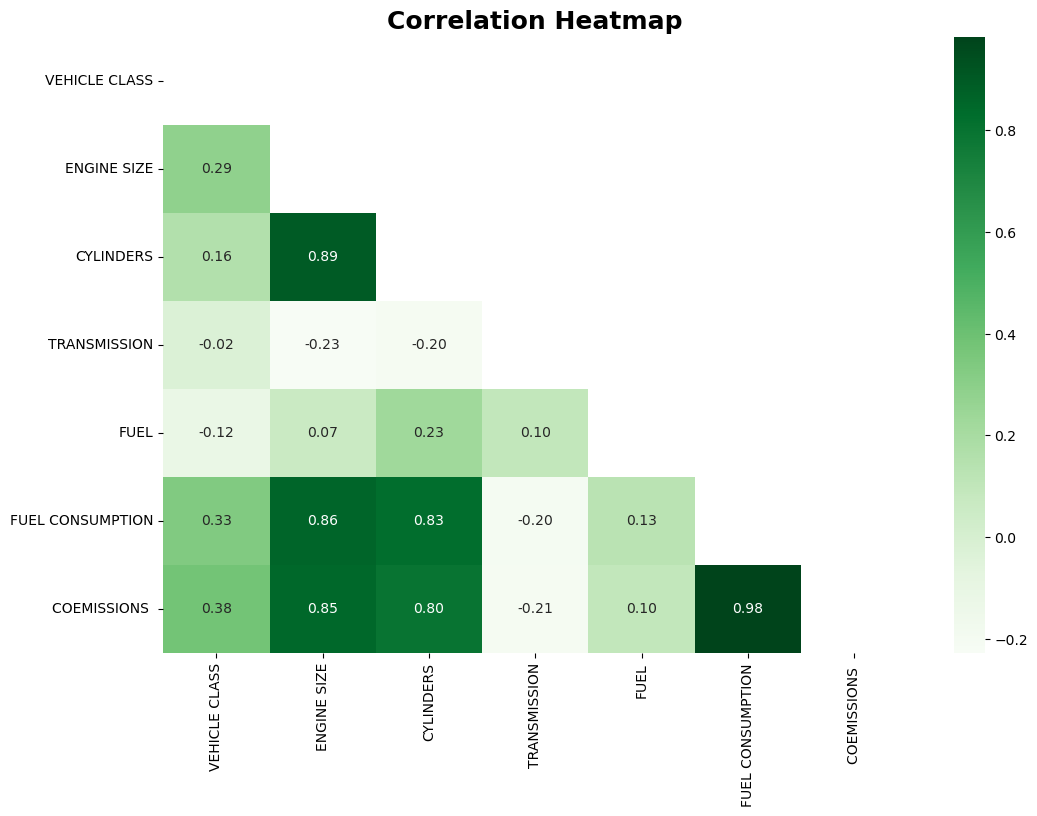

In [120]:
plot_correlation_heatmap(df, save_path='m1.png', dpi=300)

The **correlation coefficient** is a number between -1 and 1 that indicates how strong and in what direction the relationship is between two variables.

- A correlation coefficient of 1 indicates a perfect positive correlation meaning that as the value of one variable increases, the value of the other variable also increases.
- A correlation coefficient of 0 indicates no correlation between the two variables.

Here:
- ‘FUEL CONSUMPTION’ and ‘COEMISSIONS’ (0.98), ‘CYLINDERS’ and ‘ENGINE SIZE’ (0.89), 'FUEL CONSUMPTION' and 'ENGINE SIZE' (0.86), 'COEMISSIONS' and 'ENGINE SIZE' (0.85), ‘CYLINDERS’ and ‘COEMISSIONS’ (0.80), ‘CYLINDERS’ and ‘FUEL CONSUMPTION’ (0.83) and similarly all those which are greater than 0 are indicating moderate positive correlation, which means that one increases as the other increases.
- 'FUEL CONSUMPTION' and 'TRANSMISSION' (-0.20), 'COEMISSIONS' and 'TRANSMISSION' (-0.21), ‘TRANSMISSION’ and ‘ENGINE SIZE’ (-0.23), ‘TRANSMISSION’ and ‘CYLINDERS’ (-0.20) and similarly all those which are lesser than 0 are indicating moderate negative correlation, which means that one increases as the other increases.
- Other variables exhibit either weak positive correlation, weak negative correlation, or no correlation (close to 0).

##### Boxplots

In [121]:
def plot_boxplots(df, columns, save_path=None, dpi=300):
    """
    Plot boxplots for specified columns in the DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.
        columns (list): List of column names for which boxplots will be plotted.
        save_path (str, optional): File path to save the boxplot image.
        dpi (int, optional): Dots per inch for saving the image (default: 300).

    Returns:
        None
    """
    # Create a figure and axes for the boxplot
    num_columns = len(columns)
    rows = (num_columns + 1) // 2  # Calculate number of rows needed based on columns
    plt.figure(figsize=(18, 5 * rows))  # Adjust figure size based on the number of columns

    # Loop through each column and create a boxplot
    for i, column in enumerate(columns):
        plt.subplot(rows, 2, i + 1)  # Create subplots dynamically based on number of columns
        sns.boxplot(x=df[column], color='blue')  # Create boxplot with specified color
        plt.title(f'BOX PLOT OF {column}', fontsize=18, fontweight='bold')  # Set title
        plt.xlabel(column, fontsize=14, fontweight='bold')  # Set x-axis label
        plt.ylabel('Value', fontsize=14, fontweight='bold')  # Set y-axis label

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    #Save the plot
    plt.savefig(save_path, dpi=dpi)

    # Display the boxplot
    plt.show()

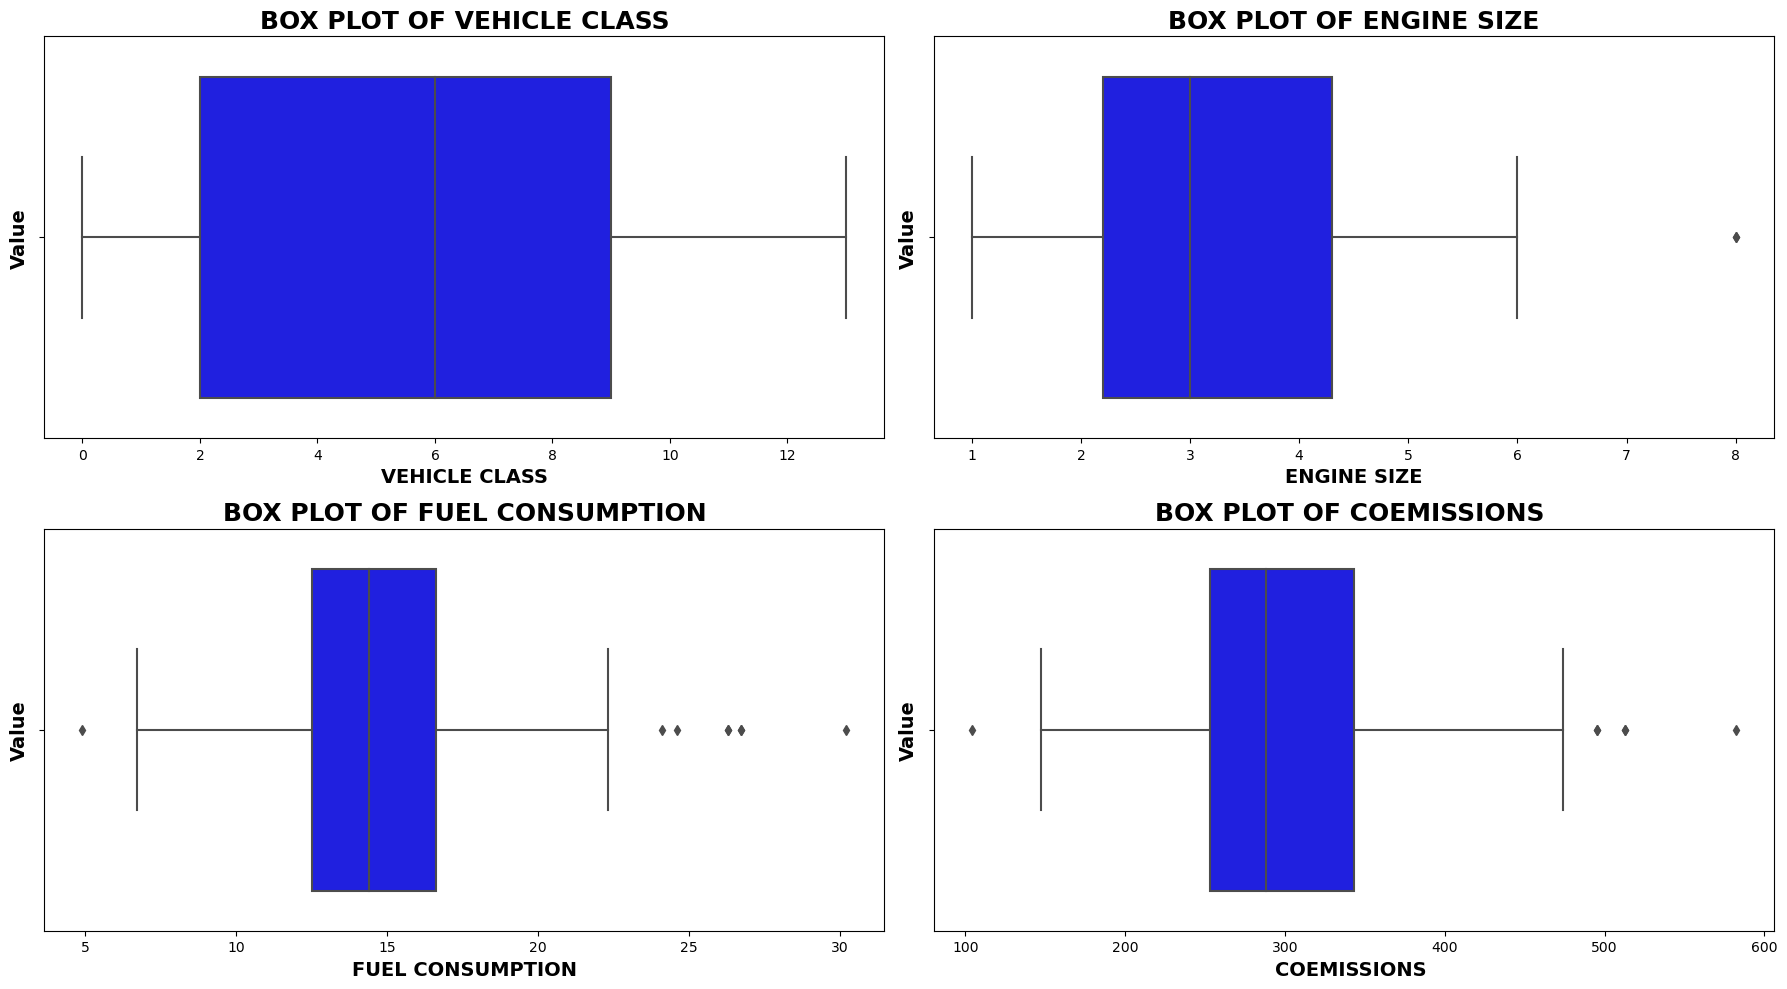

In [122]:
colm=['VEHICLE CLASS', 'ENGINE SIZE', 'FUEL CONSUMPTION', 'COEMISSIONS ']
plot_boxplots(df, colm, save_path='m2.png', dpi=300)

##### Major Moments

In [123]:
import pandas as pd
import scipy.stats as stats

# Assuming df is your DataFrame
# Let's focus on the numerical columns for the analysis
numerical_columns = ['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS ']

# Calculate mean
mean_values = df[numerical_columns].mean()

# Calculate median
median_values = df[numerical_columns].median()

# Calculate standard deviation
stddev_values = df[numerical_columns].std()

# Calculate skewness
skewness_values = df[numerical_columns].skew()

# Calculate kurtosis
kurtosis_values = df[numerical_columns].kurtosis()

# Display the results
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation':stddev_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values
})
print('Major Moments:')
print(summary_stats)


Major Moments:
                        Mean  Median  Standard Deviation  Skewness  Kurtosis
ENGINE SIZE         3.264577     3.0            1.231634  0.552729 -0.355018
CYLINDERS           5.802508     6.0            1.624535  0.715870  0.738942
FUEL CONSUMPTION   14.705956    14.4            3.303962  0.575181  1.172661
COEMISSIONS       296.642633   288.0           65.420203  0.535816  0.441271


**Skewness** is described as the asymmetry measure of the data distribution, whereas **Kurtosis** is described as tailedness or peakedness measure of the data distribution. The following code determines the skewness and kurtosis values of all the columns present in the dataset:

**For Skewness:**
- Skewness approximately equal to 0, the distribution is symmetric.
- Skewness is greater than 0, the distribution is right skewed.
- Skewness is lesser than 0, the distribution is left skewed.
- The columns 'sex', 'region' and 'age' are almost symmetric.
- The columns 'bmi' and 'children' are weakly right skewed.
- The columns  'smoker' and 'charges' are moderate right skewed.

**For Kurtosis:**
- Kurtosis lesser than 3 indicates lighter tails and a flatter peak (platykurtic).
- All the columns of this dataset are platykurtic.

##### Distribution/Bar Plots (Visualizing Skewness and Kurtosis)

In [124]:
def plot_distribution_plots(df, features, num_cols=3, plot_color='purple', save_path=None, dpi=300):
    """
    Plot distribution plots for specified features in the DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.
        features (list): List of feature column names to plot.
        num_cols (int, optional): Number of plots to display per row (default: 3).
        plot_color (str, optional): Color for the distribution plots (default: 'purple').
        save_path (str, optional): File path to save the distribution plots image.
        dpi (int, optional): Dots per inch for saving the image (default: 300).

    Returns:
        None
    """
    num_features = len(features)
    num_rows = (num_features - 1) // num_cols + 1  # Calculate number of rows needed

    fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
    plt.subplots_adjust(wspace=0.2, hspace=0.31)

    for i in range(num_features):
        row = i // num_cols
        col = i % num_cols
        sns.distplot(df[features[i]], fit=norm, ax=ax[row, col], color=plot_color)
        title = 'Distribution: ' + features[i]
        ax[row, col].set_title(title, fontsize=17, fontweight='bold')
        ax[row, col].xaxis.label.set_fontsize(14)
        ax[row, col].yaxis.label.set_fontsize(14)
        ax[row, col].xaxis.label.set_fontweight('bold')
        ax[row, col].yaxis.label.set_fontweight('bold')

        # Hide the y-axis label for all but the first column in each row
        if col != 0:
            ax[row, col].yaxis.set_visible(False)

    # Save the plot
    plt.savefig(save_path, dpi=dpi)

    # Display the distribution plots
    plt.show()

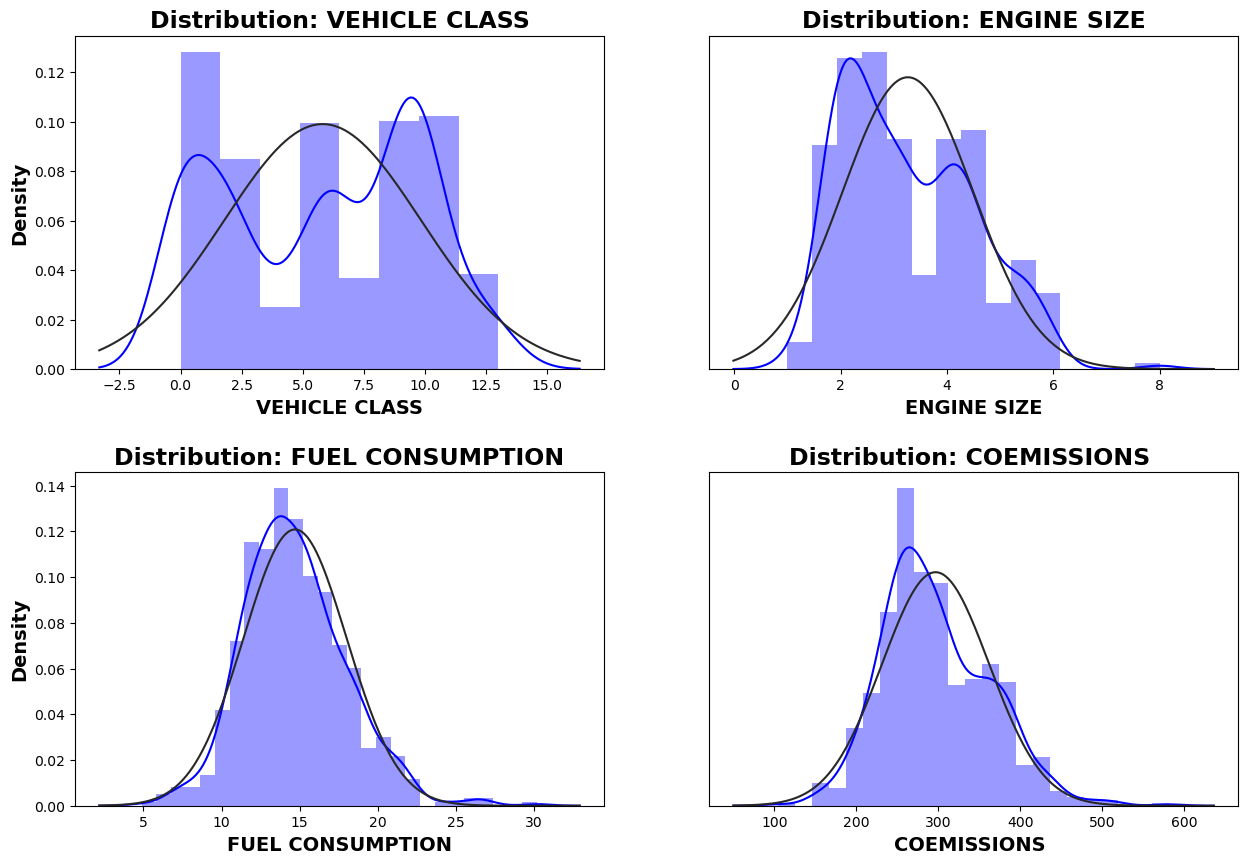

In [125]:
plot_distribution_plots(df, colm, num_cols=2, plot_color='blue', save_path='m3.png', dpi=300)

##### Scatterplot

In [126]:
def plot_scatter_with_hue(df, x_col, y_col, hue_col, title=None, xlabel=None, ylabel=None, save_path=None, dpi=300):
    """
    Plot a scatter plot with hue based on a categorical variable.

    Parameters:
        df (DataFrame): Input DataFrame.
        x_col (str): Column name for the x-axis.
        y_col (str): Column name for the y-axis.
        hue_col (str): Column name for the hue (categorical variable).
        title (str, optional): Title of the plot (default: None).
        xlabel (str, optional): Label for the x-axis (default: None).
        ylabel (str, optional): Label for the y-axis (default: None).
        save_path (str, optional): File path to save the plot image.
        dpi (int, optional): Dots per inch for saving the image (default: 300).

    Returns:
        None
    """
    plt.figure(figsize=(6, 4))
    plt.title(title, fontsize=17, fontweight='bold') if title else None
    plt.ylabel(ylabel, fontsize=14, fontweight='bold') if ylabel else None
    plt.xlabel(xlabel, fontsize=14, fontweight='bold') if xlabel else None

    sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue_col)

    # Adjust layout
    plt.tight_layout()

    # Save the plot 
    plt.savefig(save_path, dpi=dpi)

    # Display the plot
    plt.show()

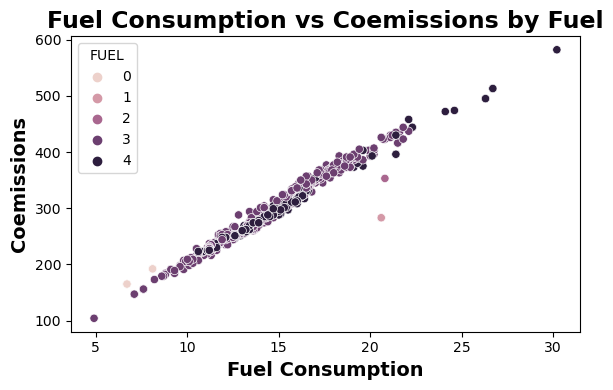

In [127]:
plot_scatter_with_hue(df, x_col='FUEL CONSUMPTION', y_col='COEMISSIONS ', hue_col='FUEL',
                      title="Fuel Consumption vs Coemissions by Fuel",
                      xlabel='Fuel Consumption', ylabel='Coemissions',
                      save_path='m4.png', dpi=300)

##### Elbow Method for Optimal 'k'

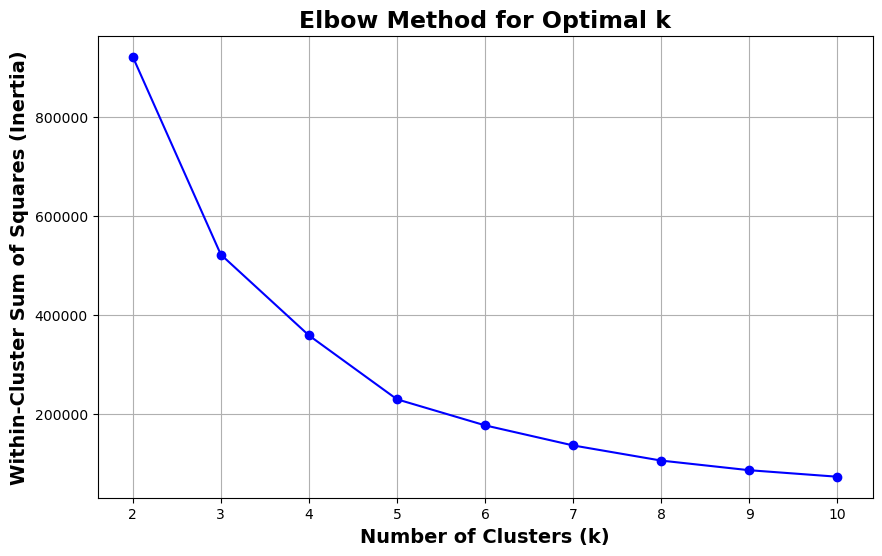

In [128]:
# Extract features for clustering (exclude the 'quality' column)
X = df.drop(['MAKE','MODEL'], axis=1)

# Initialize lists to store inertia values
inertia_values = []

# Test different values of k (number of clusters)
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    # Create KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Clusters (k)', fontsize=14, fontweight='bold')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)', fontsize=14, fontweight='bold')
plt.title('Elbow Method for Optimal k', fontsize=17, fontweight='bold')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('m5.png', dpi=300)
plt.show()

### Model Creation and Evaluation

##### Clustering

In [129]:
def perform_kmeans_clustering(df, features, n_clusters=3, random_state=None):
    """
    Perform K-means clustering on specified features in the DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame containing the data.
        features (list): List of feature column names to use for clustering.
        n_clusters (int, optional): Number of clusters to form (default: 3).
        random_state (int, optional): Random seed for reproducibility (default: None).

    Returns:
        dict: A dictionary containing important variables from the K-means clustering:
            - 'cluster_labels': Series of cluster labels assigned to each data point.
            - 'cluster_centers': Array of cluster centers.
        km (Model): Trained K-Means model
    """
    # Initialize KMeans model
    km = KMeans(n_clusters=n_clusters, random_state=random_state)

    # Fit K-means and assign cluster labels
    df['cluster'] = km.fit_predict(df[features])

    # Get cluster labels and cluster centers
    cluster_labels = df['cluster']
    cluster_centers = km.cluster_centers_

    # Return important variables as a dictionary
    return {'cluster_labels': cluster_labels, 'cluster_centers': cluster_centers}, km

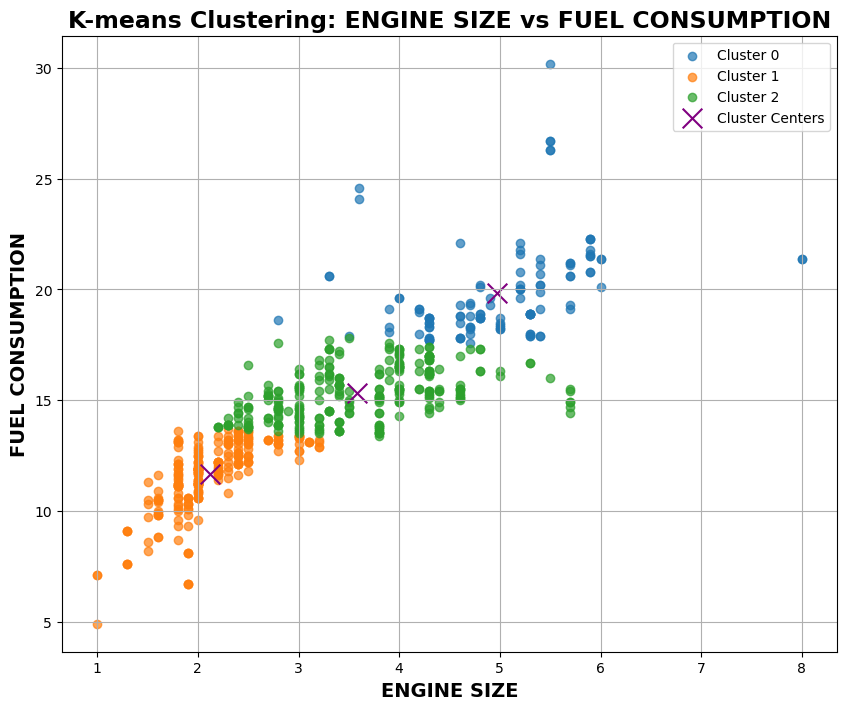

In [130]:
kmeans_data, km = perform_kmeans_clustering(df, features=['ENGINE SIZE', 'FUEL CONSUMPTION'], n_clusters=3, random_state=42)

#Plot clusters with cluster centers based on the returned data
plt.figure(figsize=(10, 8))
for cluster_label in sorted(kmeans_data['cluster_labels'].unique()):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['ENGINE SIZE'], cluster_data['FUEL CONSUMPTION'], label=f'Cluster {cluster_label}', alpha=0.7)

#Plot cluster centers
cluster_centers = kmeans_data['cluster_centers']
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='purple', label='Cluster Centers')

#Set plot title and labels
plt.title('K-means Clustering: ENGINE SIZE vs FUEL CONSUMPTION', fontsize=17, fontweight='bold')
plt.xlabel('ENGINE SIZE', fontsize=14, fontweight='bold')
plt.ylabel('FUEL CONSUMPTION', fontsize=14, fontweight='bold')

#Add legend and grid
plt.legend()
plt.grid(True)

#Save the plot if needed
plt.savefig('m6.png', dpi=300)
plt.show()

##### Checking the code if it predicts correctly

In [131]:
# Example new data point(s) for prediction
new_data = pd.DataFrame({'ENGINE SIZE': [2, 4],'FUEL CONSUMPTION': [15,20]})

# Use the trained K-means model to predict cluster labels for the new data
predicted_clusters = km.predict(new_data)

# Display the predicted cluster labels for the new data points
for i, cluster_label in enumerate(predicted_clusters):
    print(f"Predicted Cluster for New Data Point {i + 1}: {cluster_label}")

Predicted Cluster for New Data Point 1: 2
Predicted Cluster for New Data Point 2: 0


##### Visualizing the Predictions

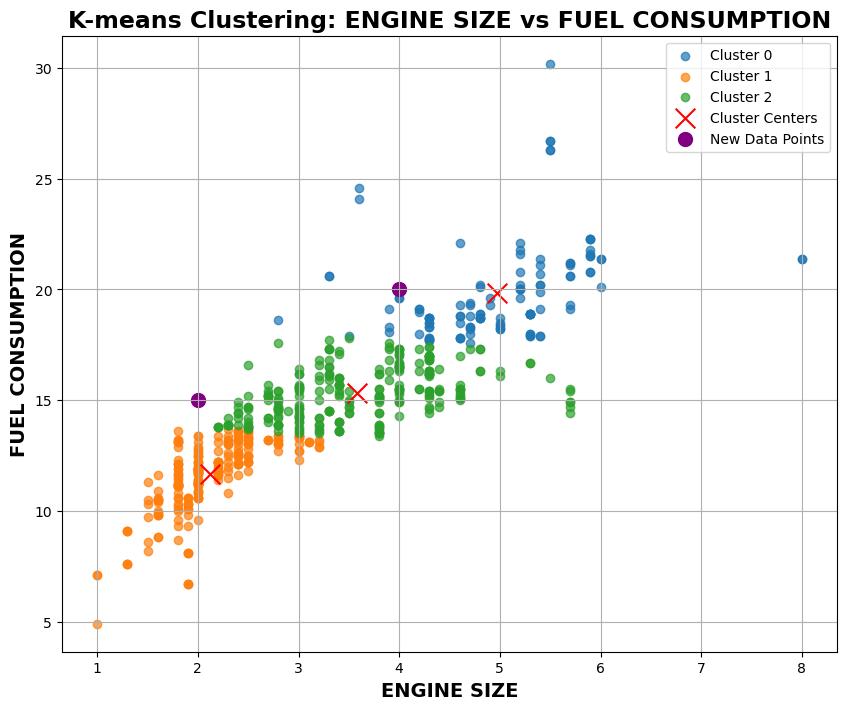

In [132]:
# Plot the new data points along with existing clusters and cluster centers
plt.figure(figsize=(10, 8))

# Plot each existing cluster using a different color
for cluster_label in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['ENGINE SIZE'], cluster_data['FUEL CONSUMPTION'], label=f'Cluster {cluster_label}', alpha=0.7)

# Plot cluster centers
cluster_centers = km.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='red', label='Cluster Centers')

# Plot the new data points with predicted cluster labels
plt.scatter(new_data['ENGINE SIZE'], new_data['FUEL CONSUMPTION'], marker='o', s=100, c='purple', label='New Data Points')

# Set plot title and labels
plt.title('K-means Clustering: ENGINE SIZE vs FUEL CONSUMPTION', fontsize=17, fontweight='bold')
plt.xlabel('ENGINE SIZE', fontsize=14, fontweight='bold')
plt.ylabel('FUEL CONSUMPTION', fontsize=14, fontweight='bold')

# Add legend
plt.legend()
plt.grid(True)
plt.savefig('m8.png', dpi=300)
plt.show()

##### Fitting

In [133]:
def perform_linear_regression(df, target_col, test_size=0.2, random_state=None):
    """
    Perform linear regression on the dataset and return important variables.

    Parameters:
        df (DataFrame): Input DataFrame containing the data.
        target_col (str): Name of the target variable column.
        test_size (float, optional): Proportion of the dataset to include in the test split (default: 0.2).
        random_state (int, optional): Random seed for reproducibility (default: None).

    Returns:
        dict: A dictionary containing important variables from the linear regression:
            - 'X_train': Training features.
            - 'X_test': Test features.
            - 'y_train': Training target variable.
            - 'y_test': Test target variable.
            - 'model': Trained LinearRegression model.
            - 'y_pred': Predicted values on the test set.
    """
    # Separate features (X) and target variable (y)
    X = df.drop(target_col, axis=1)
    X=df.drop(['MAKE','MODEL'], axis=1)
    y = df[target_col]

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize Linear Regression model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Return important variables as a dictionary
    return {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'model': model,
        'y_pred': y_pred,
    }

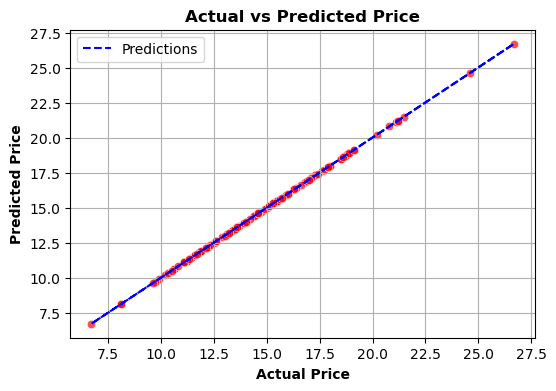

In [134]:
regression_info=perform_linear_regression(df, 'FUEL CONSUMPTION', test_size=0.2, random_state=42)
model = regression_info['model']
X_test = regression_info['X_test']
y_test = regression_info['y_test']
y_pred = regression_info['y_pred']

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, color='red', alpha=0.7)
plt.plot(y_pred, y_pred, color='blue', linestyle='--', label='Predictions')  # Plot the diagonal line for perfect predictions
plt.title('Actual vs Predicted Price', fontsize=12, fontweight='bold')
plt.xlabel('Actual Price', fontsize=10, fontweight='bold')
plt.ylabel('Predicted Price', fontsize=10, fontweight='bold')
plt.legend()
plt.grid(True)
plt.savefig('m7.png', dpi=300)
plt.show()

In [135]:
#Calculating the coefficients

coefficients = model.coef_
print(f'Coefficients {coefficients}')

#Calculating the intercept

intercept = model.intercept_
print(f'Intercept: {intercept}')

#Calculating R-Squared

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

#Calculating Root Mean Squared Error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

#Calculating Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE {mae}')

#Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Coefficients [-1.14019152e-16 -3.42429207e-16 -1.77162314e-16  1.73880815e-16
 -4.76608285e-16  1.00000000e+00  5.02253445e-17 -1.05860970e-16]
Intercept: -1.7763568394002505e-15
R2: 1.0
RMSE: 1.866033584759964e-15
MAE 1.1310397063368782e-15
Mean Squared Error: 3.4820813394521224e-30
